<a href="https://colab.research.google.com/github/Ileshgattu/data-science-assignments/blob/main/Copy_of_ASSIGNMENT2_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Decision Tree
 # Assignment
# About the data:
# Let’s consider a Company dataset with around 10 variables and 400 records.
# The attributes are as follows:
#  Sales -- Unit sales (in thousands) at each location
#  Competitor Price -- Price charged by competitor at each location
#  Income -- Community income level (in thousands of dollars)
#  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
#  Population -- Population size in region (in thousands)
#  Price -- Price company charges for car seats at each site
#  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
#  Age -- Average age of the local population
#  Education -- Education level at each location
#  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
#  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
# The company dataset looks like this:
# Problem Statement:
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df['Sales'] = pd.cut(x=df['Sales'],bins = [0,6,12,17], labels = ['Low', 'Medium', 'High'], right = False )
df['CompPrice'] = pd.cut(x=df['CompPrice'],bins = [77,100,135,176], labels = ['Low', 'Medium', 'High'], right = False )
df['Income'] = pd.cut(x=df['Income'],bins = [21,70,92,120], labels = ['Low', 'Medium', 'High'], right = False )
df['Advertising'] = pd.cut(x=df['Advertising'],bins = [0,10,20,30], labels = ['Low', 'Medium', 'High'], right = False )
df['Population'] = pd.cut(x=df['Population'],bins = [10,140,400,510], labels = ['Low', 'Medium', 'High'], right = False )
df['Price'] = pd.cut(x=df['Price'],bins = [24,120,132,192], labels = ['Low', 'Medium', 'High'], right = False )
df['Age'] = pd.cut(x=df['Age'],bins = [25,40,70,81], labels = ['Low', 'Medium', 'High'], right = False )
df['Education'] = pd.cut(x=df['Education'],bins = [10,13,15,19], labels = ['Low', 'Medium', 'High'], right = False )

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,Medium,Medium,Medium,Medium,Bad,Medium,High,Yes,Yes
1,Medium,Medium,Low,Medium,Medium,Low,Good,Medium,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Low,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Low,Medium,Medium,Medium,Yes,Yes
4,Low,High,Low,Low,Medium,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,Medium,High,Medium,Medium,High,Yes,Yes
398,Low,Medium,Medium,Low,Medium,Low,Bad,Medium,Low,Yes,Yes


In [ ]:
df['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df.iloc[:,:]:
  df[i] = LE.fit_transform(df[i])

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,2,2,2,2,0,2,0,1,1
1,2,2,1,2,2,1,1,2,1,1,1
2,2,2,1,2,2,1,2,2,1,1,1
3,2,2,0,1,0,1,2,2,2,1,1
4,1,0,1,1,2,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,2,0,2,2,0,1,1
398,1,2,2,1,2,1,0,2,1,1,1


In [ ]:
Y = df['Sales']
X = df.drop('Sales',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int64
 10  US           400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
aas_train = []
aas_test = []
for i in range(1,500):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
  DTC = DecisionTreeClassifier()
  DTC.fit(X_train,Y_train)
  Y_pred_train = DTC.predict(X_train)
  Y_pred_test = DTC.predict(X_test)
  aas_train.append(accuracy_score(Y_train,Y_pred_train))
  aas_test.append(accuracy_score(Y_test,Y_pred_test))
print('number of nodes are ',DTC.tree_.node_count)
print('Maximum depth is ',DTC.tree_.max_depth)
print('Averge Accuracy score is',np.mean(aas_train))
print('Average Accuracy score is',np.mean(aas_test))

number of nodes are  221
Maximum depth is  13
Averge Accuracy score is 0.9816991125107357
Average Accuracy score is 0.5794589178356713


In [ ]:
aas_train = []
aas_test = []
for i in range(1,500):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
  DTC = DecisionTreeClassifier(criterion='entropy',max_depth=5)
  DTC.fit(X_train,Y_train)
  Y_pred_train = DTC.predict(X_train)
  Y_pred_test = DTC.predict(X_test)
  aas_train.append(accuracy_score(Y_train,Y_pred_train))
  aas_test.append(accuracy_score(Y_test,Y_pred_test))
print('No.of nodes are',DTC.tree_.node_count)
print('Max. depth is',DTC.tree_.max_depth)
print('Average Accuracy score is',np.mean(aas_train))
print('Average Accuracy score is',(np.mean(aas_test)))

No.of nodes are 47
Max. depth is 5
Average Accuracy score is 0.7739836816490123
Average Accuracy score is 0.6699899799599199


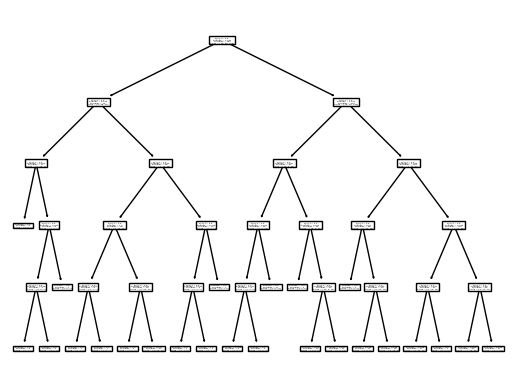

In [ ]:
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
plt.show(tree.plot_tree(DTC))

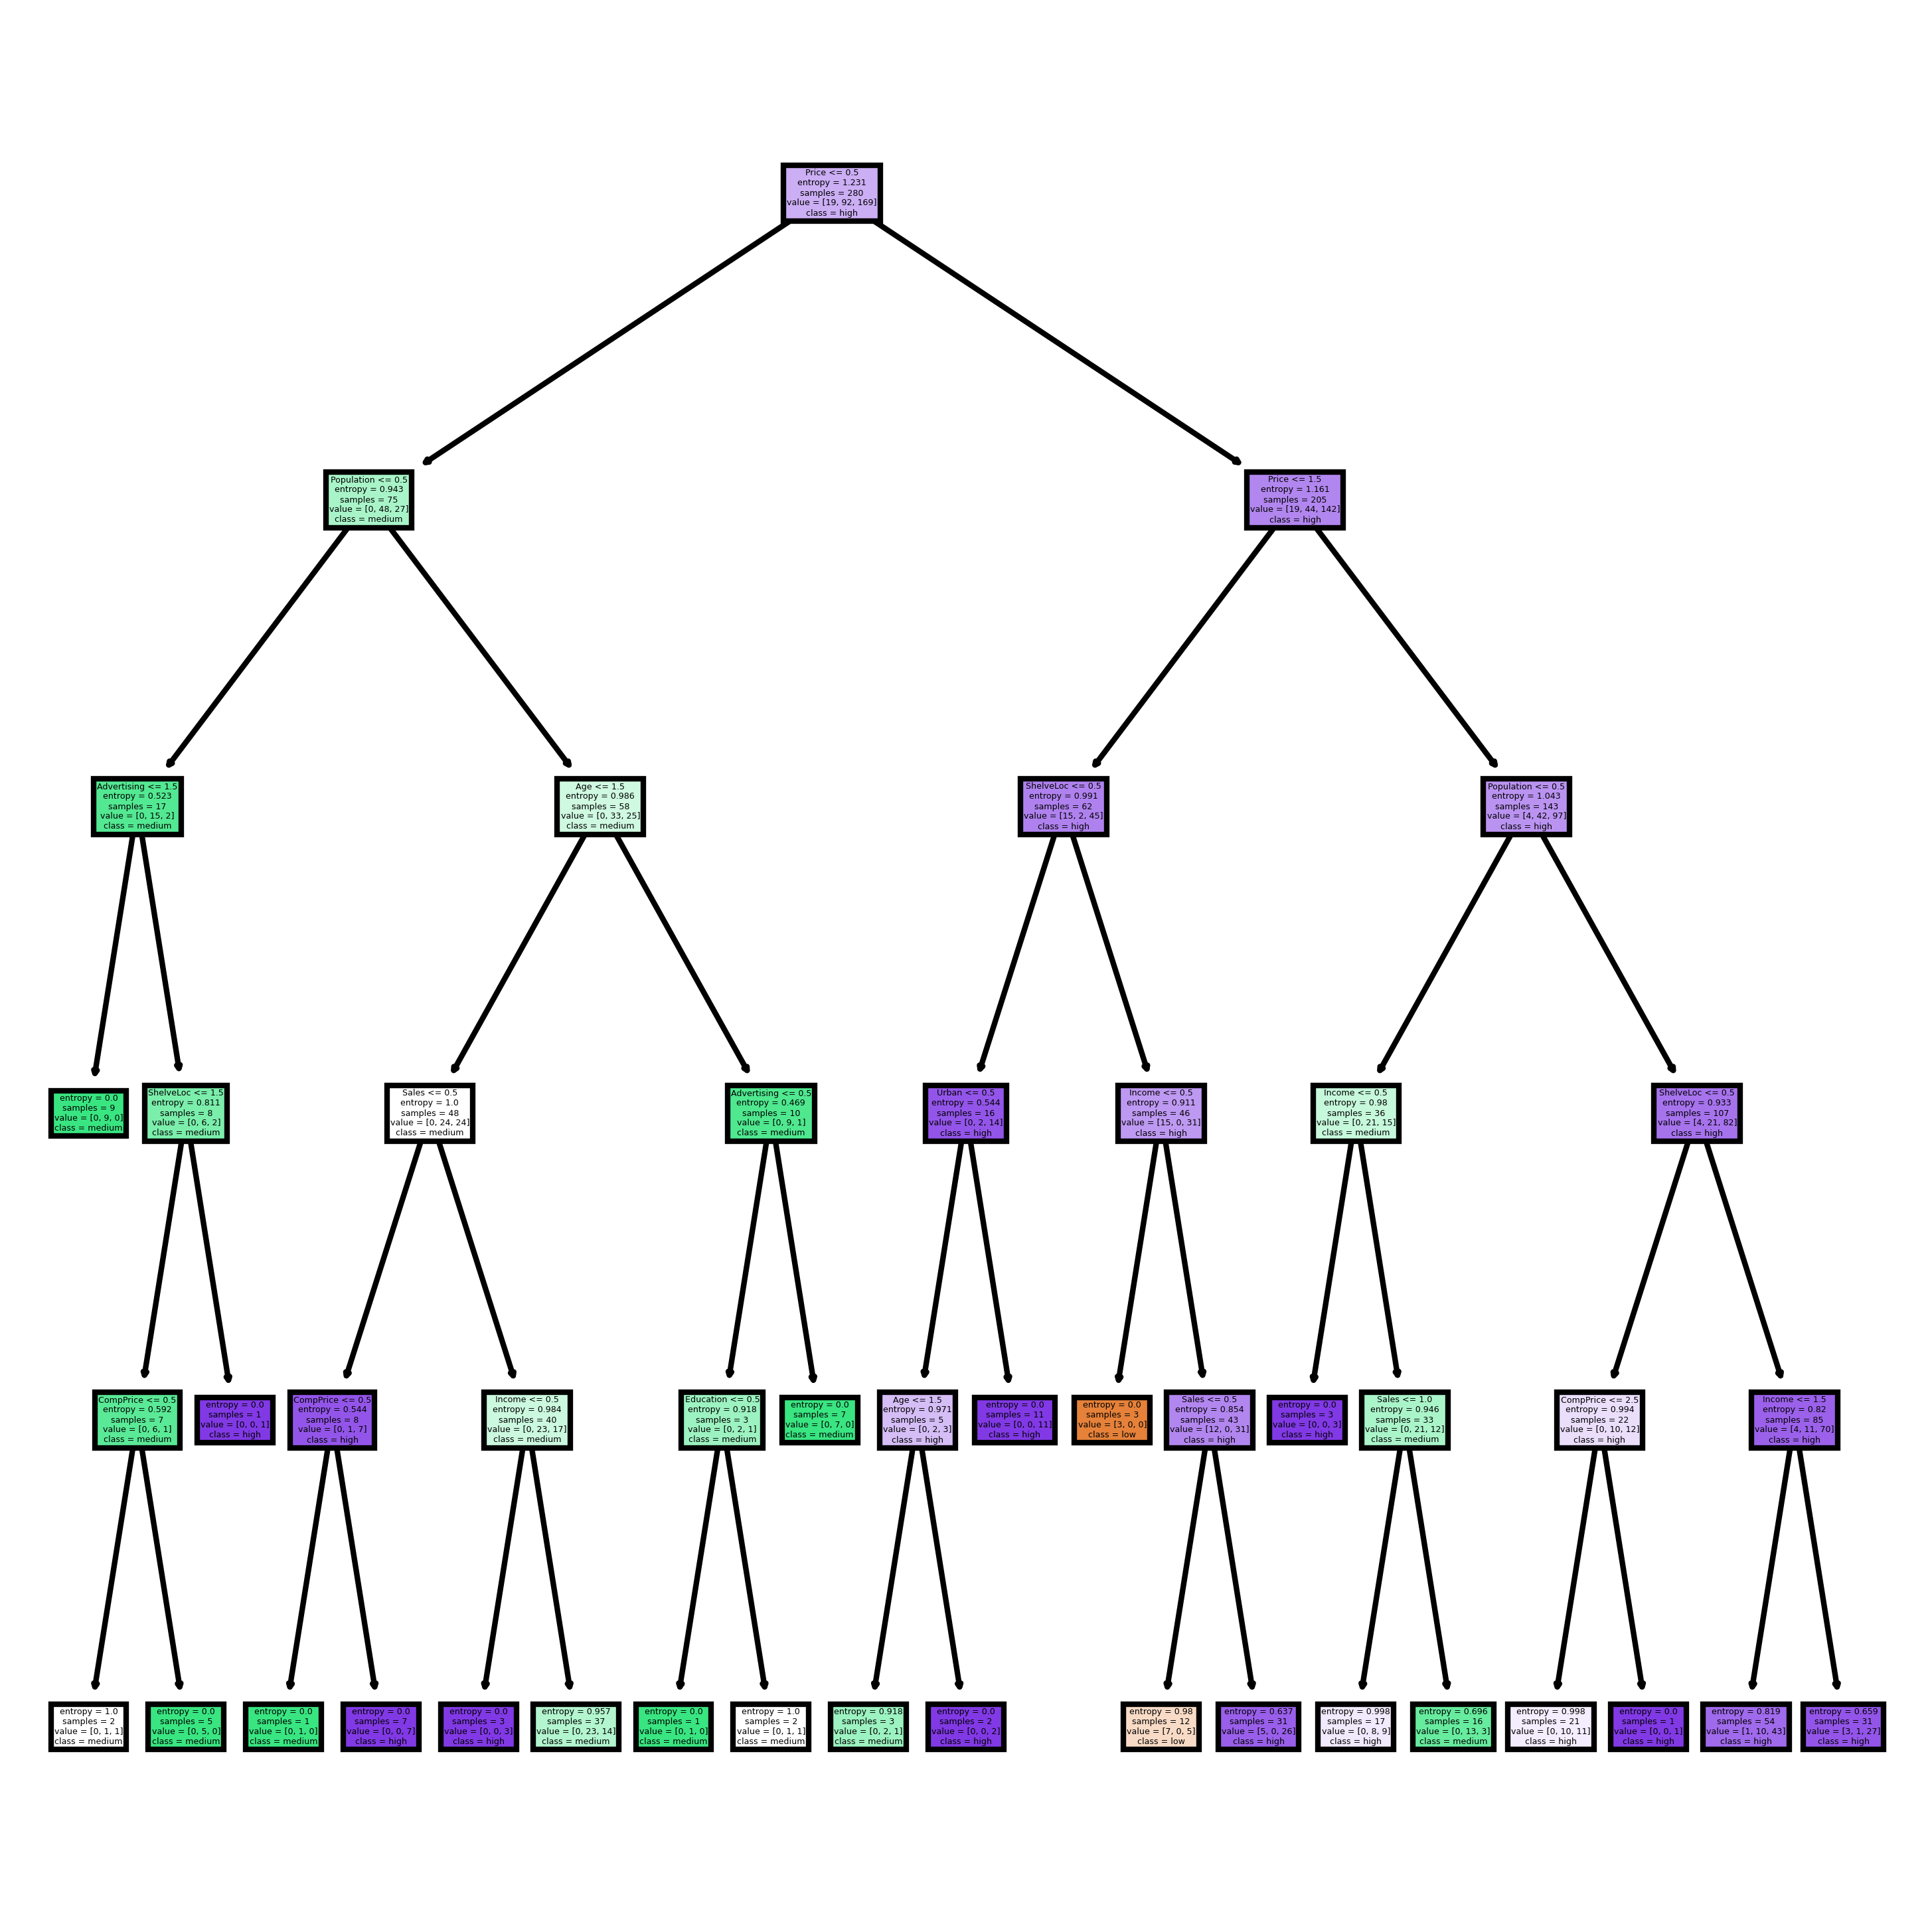

In [ ]:
fn = list(df)
cn = ['low','medium','high']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
plt.show(tree.plot_tree(DTC,feature_names=fn,class_names=cn,filled=True))

In [ ]:
aas_train = []
aas_test = []
for i in range(1,500):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
  DT = DecisionTreeClassifier(criterion='gini',max_depth=5)
  DT.fit(X_train,Y_train)
  Y_pred_train = DT.predict(X_train)
  Y_pred_test = DT.predict(X_test)
  aas_train.append(accuracy_score(Y_train,Y_pred_train))
  aas_test.append(accuracy_score(Y_test,Y_pred_test))
print('No.of nodes are',DT.tree_.node_count)
print('Max. depth is',DT.tree_.max_depth)
print('Average Accuracy score is',np.mean(aas_train))
print('Average Accuracy score is',(np.mean(aas_test)))

No.of nodes are 43
Max. depth is 5
Average Accuracy score is 0.7804895505296308
Average Accuracy score is 0.6679358717434869


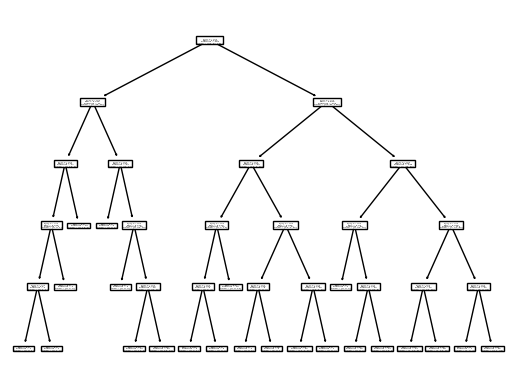

In [ ]:
plt.show(tree.plot_tree(DT))

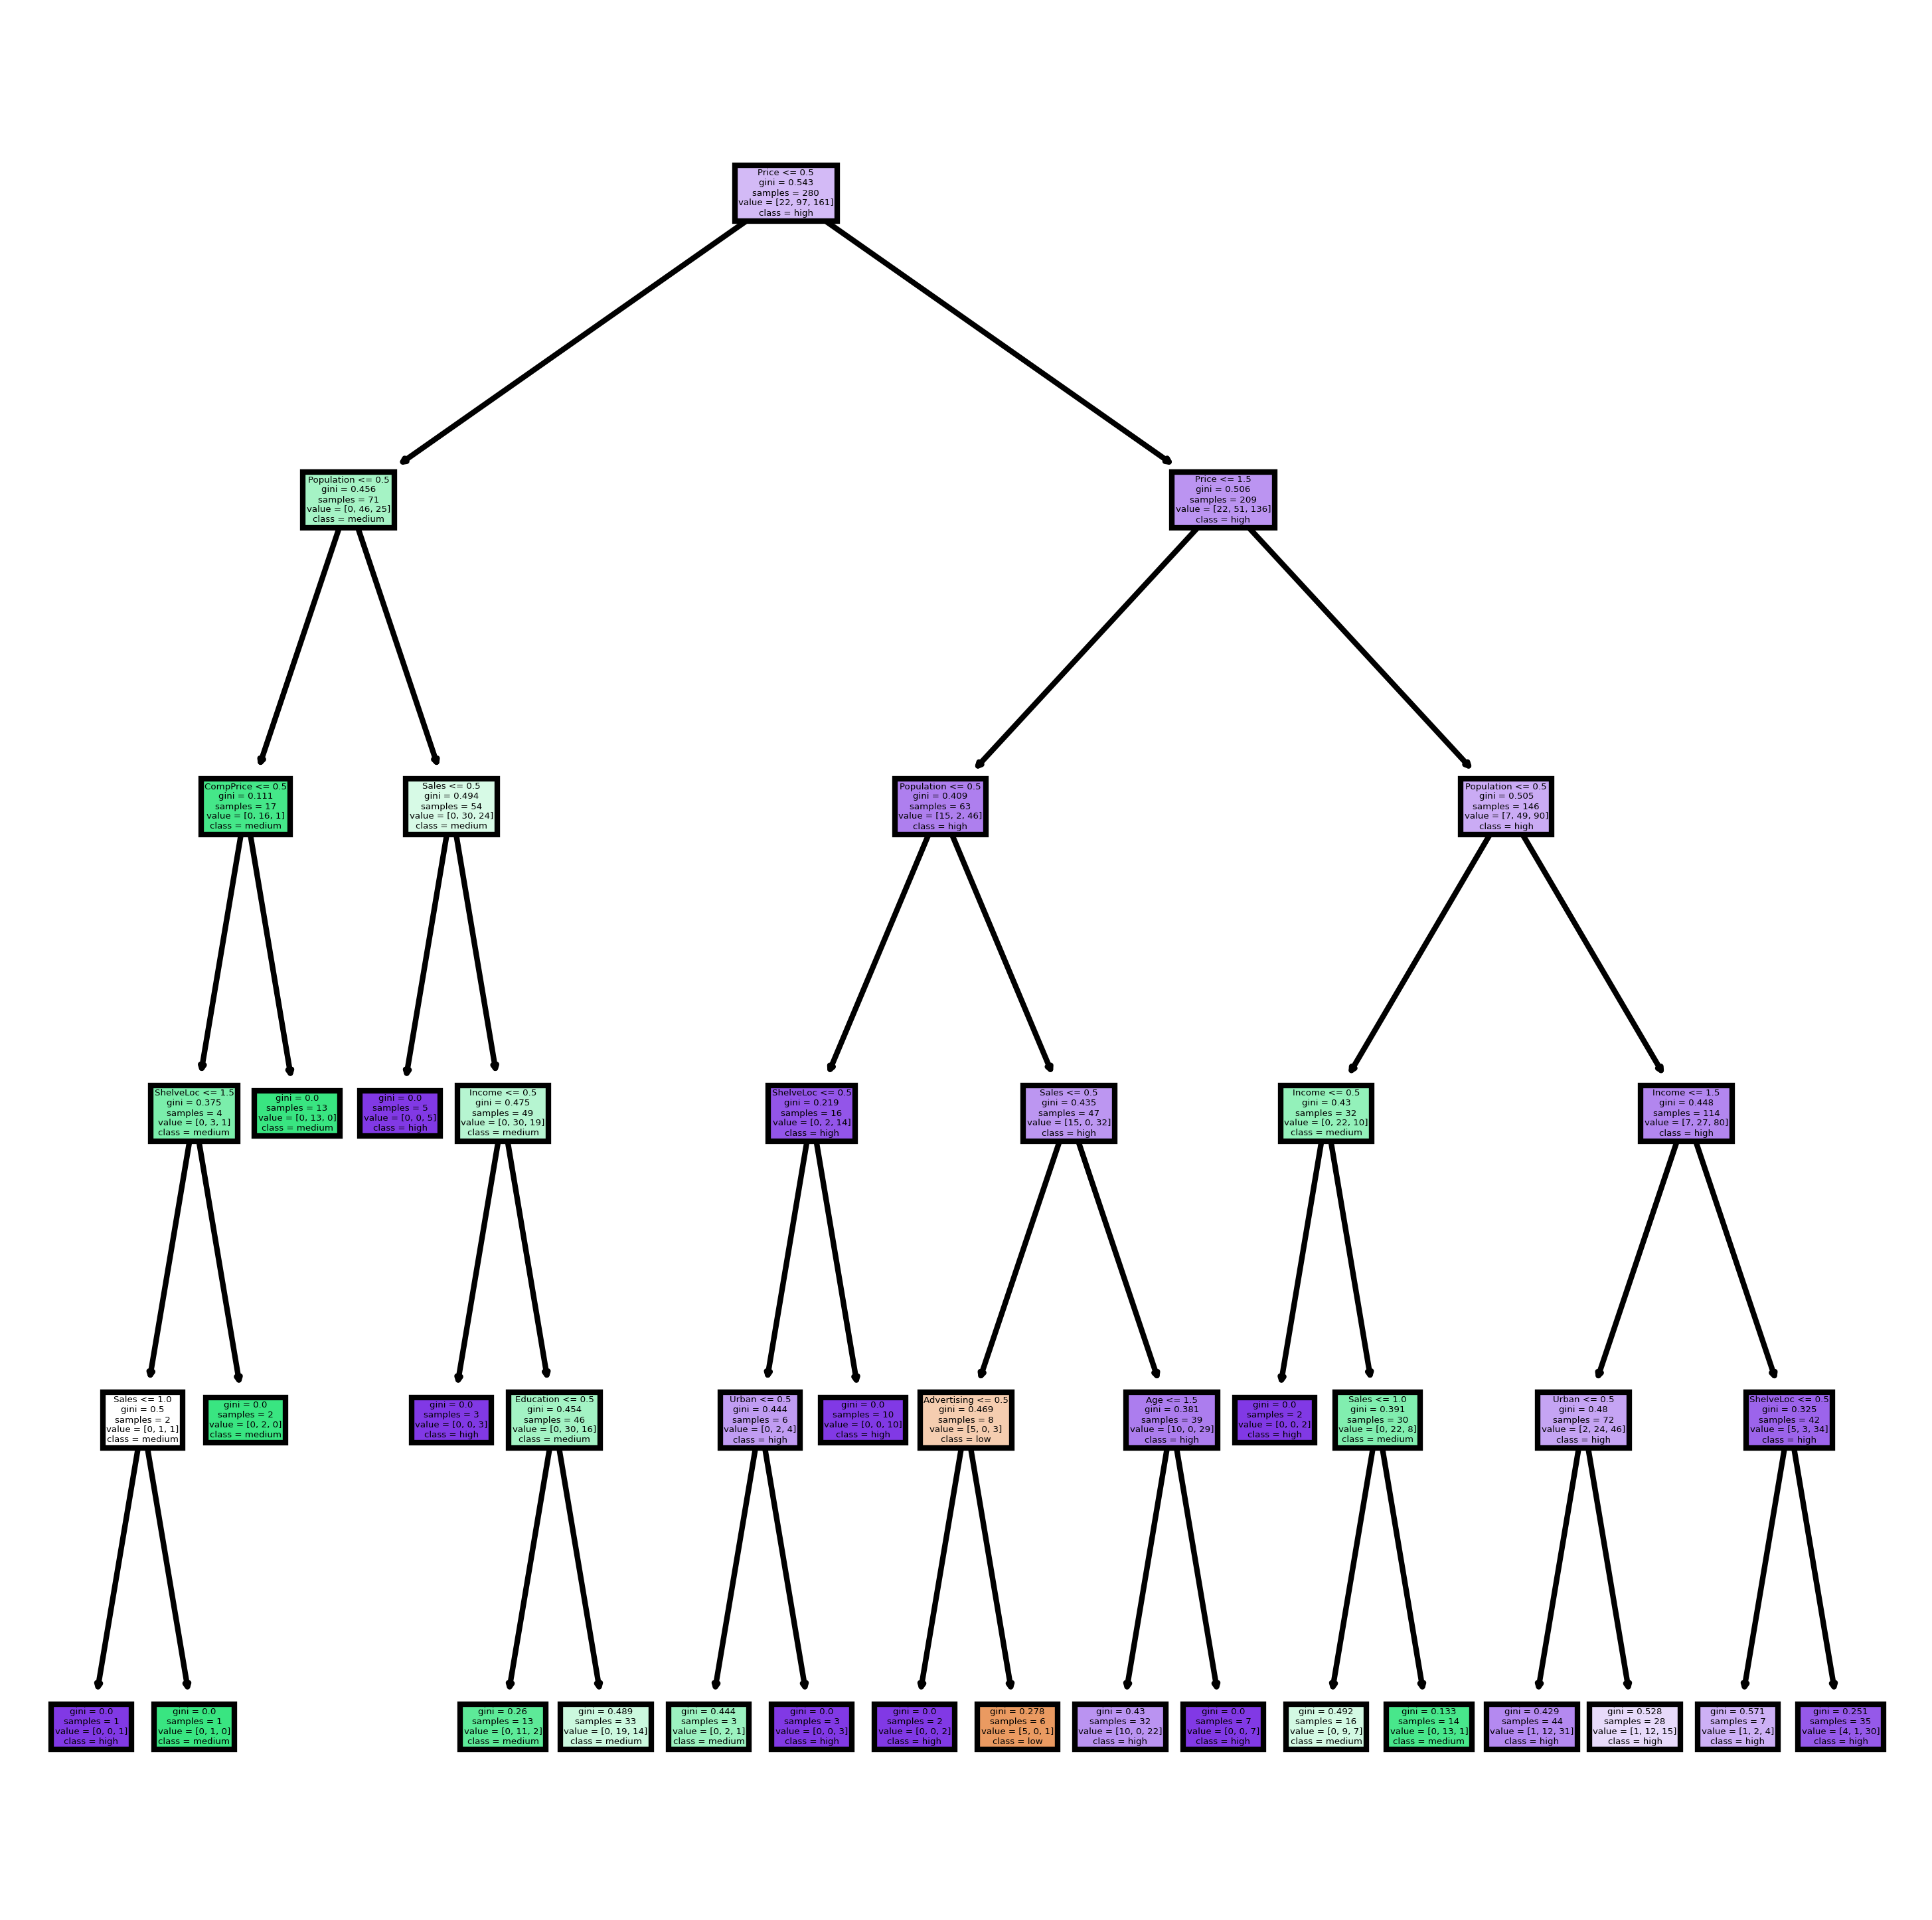

In [ ]:
fn = list(df)
cn = ['low','medium','high']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=600)
plt.show(tree.plot_tree(DT,feature_names = fn,class_names=cn,filled=True))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_samples=0.5,max_features=0.8)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
RFC.fit(X_train,Y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)
print('Accuracy score for train is',accuracy_score(Y_train,Y_pred_train))
print('Accuracy score for test is',accuracy_score(Y_test,Y_pred_test))

Accuracy score for train is 0.95
Accuracy score for test is 0.6666666666666666


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X = pd.DataFrame(ss_X)
ss_X.columns = list(X)
ss_X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,-1.627449,1.359455,1.306546,0.908379,1.504819,-1.570698,0.824585,-1.013944,0.646869,0.741881
1,0.660704,-0.034858,1.306546,0.908379,0.025881,-0.369399,0.824585,0.290164,0.646869,0.741881
2,0.660704,-0.034858,1.306546,0.908379,0.025881,0.831899,0.824585,0.290164,0.646869,0.741881
3,0.660704,-1.429170,-0.586999,-1.505918,0.025881,0.831899,0.824585,1.594272,0.646869,0.741881
4,-1.627449,-0.034858,-0.586999,0.908379,1.504819,-1.570698,-0.434323,1.594272,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,-1.627449,-1.429170,1.306546,0.908379,1.504819,-0.369399,-0.434323,1.594272,0.646869,0.741881
396,-1.627449,-0.034858,-0.586999,-0.298769,1.504819,0.831899,0.824585,0.290164,-1.545908,0.741881
397,-1.627449,-0.034858,1.306546,0.908379,-1.453056,0.831899,0.824585,-1.013944,0.646869,0.741881
398,0.660704,1.359455,-0.586999,0.908379,0.025881,-1.570698,0.824585,0.290164,0.646869,0.741881


In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
train_error = []
test_error = []
for train_index,test_index in loo.split(df):
  X_train,X_test = ss_X.iloc[train_index],ss_X.iloc[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  RFC.fit(X_train,Y_train)
  Y_pred_train = RFC.predict(X_train)
  Y_pred_test = RFC.predict(X_test)
  train_error.append(accuracy_score(Y_train,Y_pred_train))
  test_error.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy  score for train is',np.mean(train_error))
print('Accuracy score for train is',np.mean(test_error))

Accuracy  score for train is 0.9164411027568923
Accuracy score for train is 0.6675


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6)
train_error = []
test_error = []
for train_index,test_index in kfold.split(df):
  X_train,X_test = ss_X.iloc[train_index],ss_X.iloc[test_index]
  Y_train,Y_test = Y[train_index],Y[test_index]
  RFC.fit(X_train,Y_train)
  Y_pred_train = RFC.predict(X_train)
  Y_pred_test = RFC.predict(X_test)
  train_error.append(accuracy_score(Y_train,Y_pred_train))
  test_error.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy score for train is',np.mean(train_error))
print('Accuracy score for test is',np.mean(test_error))

Accuracy score for train is 0.9309968651286016
Accuracy score for test is 0.6548695914367556


In [ ]:
# Exploring On Hyperparameters Tuning on Best Parameters for the Tree

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
params = [{'max_samples':np.arange(0.1,1.5,0.2), 'max_features':np.arange(0.1,1.5,0.2)}]

In [ ]:
from sklearn.model_selection import GridSearchCV
GSC = GridSearchCV(RFC, params, cv = 10, scoring = 'accuracy')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
GSC.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=0.8,
                                              max_samples=0.5),
             param_grid=[{'max_features': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3]),
                          'max_samples': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3])}],
             scoring='accuracy')

In [ ]:
print(GSC.best_score_)

0.70625


In [ ]:
print(GSC.best_params_)

{'max_features': 0.9000000000000001, 'max_samples': 0.30000000000000004}
